In [1]:
# importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('data/clean_data.csv') # taking data to df

In [3]:
pd.options.display.max_columns=100 # to see all columns

In [4]:
df.drop(columns=['Unnamed: 0','funder','installer','construction_year'],inplace=True ) # dropping unnecessa

In [5]:
df1= df.copy() 

In [6]:
df1.drop(columns=['lga','ward'],inplace=True )

In [7]:
df1['permit'] = df1['permit'].astype(bool).astype(int) #converting from T/F to 0-1

In [8]:
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int) #converting from T/F to 0-1

In [9]:
# assigning categorical columns
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade']

In [10]:
# assigning numeric columns
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [11]:
df1['status_group'].value_counts()

status_group
0    32259
2    22824
1     4317
Name: count, dtype: int64

In [12]:
# assign target
target='status_group'

In [13]:
# seperate columns to X,y 
used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

In [14]:
# choosing train-test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# choosing scaler and encoder
scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# set rf with best grid search results

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')

#giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)


pipe.fit(X_train,y_train)
# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9204545454545454
TEST: 0.7914141414141415

Balanced Accuracy:
TRAIN: 0.9341261042973555
TEST: 0.7044348948246997


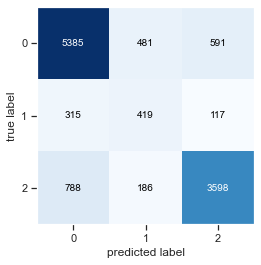

In [16]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: maximize
[LightGBM] [Warning] num_iterations is set=100, nrounds=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: maximize
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1153
[LightGBM] [Info] Number of d

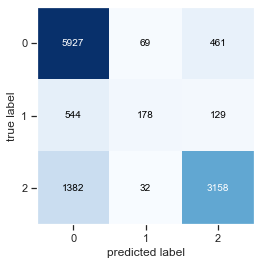

In [17]:
#seting model
lgbm = LGBMClassifier(booster = 'gbtree', nrounds = 100, maximize = False,eta = .1,max_depth = 10, colsample_bytree = .4,learning_rate = 0.1,max_delta_step=1)

#sending everthing in pipe
pipe = make_pipeline(preprocessor,lgbm)
pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

Accuracy:
TRAIN: 0.8297558922558923
TEST: 0.7951178451178451

Balanced Accuracy:
TRAIN: 0.658789681225371
TEST: 0.6227623809659145


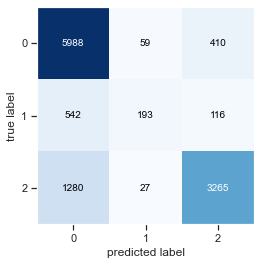

In [18]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.05)

pipe = make_pipeline(preprocessor,xgb)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [19]:
df4=df1.copy() # assign to protect original one 

In [20]:
# scaling numerical columns

scaler = preprocessing.RobustScaler()


def scaleColumns(df, num_col):
    for col in num_col:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df4[col])),columns=[col])
    return df

scaled_df = scaleColumns(df4,[num_col])

In [21]:
# assign X and y
used_cols = [c for c in scaled_df.columns.tolist() if c not in [target]]
X=scaled_df[used_cols]
y=scaled_df[target]

In [22]:
# making over-sampling 

smt = SMOTE(sampling_strategy = 'auto', n_jobs = -1)

X_sampled, y_sample = smt.fit_resample(X, y)

print(y.value_counts())

y_sampled = pd.Series(y_sample) # converting from array to np.series to see value_counts

print(y_sampled.value_counts())

ValueError: could not convert string to float: 'Lake Nyasa'

In [ ]:

#splitting train-test balanced target data
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [ ]:
# import xgboost as xgb

# Define the DMatrix for the training set
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define the DMatrix for the validation set
dvalid = xgb.DMatrix(X_test, label=y_test)

# Define a parameter dictionary for XGBoost
params = {
    'objective': 'multi:softmax',
    'booster': 'gbtree',
    'num_class': 3,
    'maximize': False,
    'eval_metric': 'merror',
    'eta': 0.1,
    'max_depth': 16,
    'colsample_bytree': 0.4,
    'n_jobs': -1,
    'learning_rate': 0.1,
    'early_stopping_rounds': 10
}

# Train the model with early stopping
evals = [(dtrain, 'train'), (dvalid, 'valid')]  # List of DMatrix for evaluation
num_round = 100  # Adjust the number of boosting rounds as needed
xgb_model = xgb.train(params, dtrain, num_round, evals=evals, verbose_eval=True)

# Make predictions
y_pred = xgb_model.predict(dtrain)
y_pred_test = xgb_model.predict(dvalid)

# Print the results
print("Accuracy:")
print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Create an instance of the XGBClassifier
xgb_smote = XGBClassifier(
    objective='multi:softmax',
    booster='gbtree',
    num_class=3,
    maximize=False,
    eval_metric='merror',
    eta=0.1,
    max_depth=16,
    colsample_bytree=0.4,
    n_jobs=-1,
    learning_rate=0.1,
    early_stopping_rounds=10
)

# Fit the model
xgb_smote.fit(X_train, y_train)

# Make predictions
y_pred = xgb_smote.predict(X_train)
y_pred_test = xgb_smote.predict(X_test)

# Print the results
print("Accuracy:")
print("=" * len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print("=" * len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")
